In [1]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




from PIL import Image
import os


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import boxcox

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
data= pd.read_csv("./data/nutrients_csvfile.csv")

data.head()


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [3]:
data.shape

(335, 10)

In [4]:
data.columns

Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [6]:
data.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,335,335,335,334,335,335,333,335,335,335
unique,329,61,103,152,40,45,38,57,80,16
top,Butter,1 cup,100,100,1,t,0,0,0,"Breads, cereals, fastfood,grains"
freq,3,120,38,14,53,115,174,116,45,45


In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(332, 10)

In [11]:
#remove , so we can convert it to numeric
data=data.replace(",","", regex=True)

In [12]:
#typo found
data=data.replace('t',0)

In [13]:
#took the average of the calories found at position 90 
data.Calories.iloc[90]=(8+44)/2

In [14]:
data.Calories.iloc[90]

26.0

In [15]:
#typo found at position 90
data['Fat']=data['Fat'].replace("t'",0, regex=True)

In [16]:
#typo found at position 80
data['Fiber']=data['Fiber'].replace('a',0,regex=True)

In [17]:
data['Grams']=pd.to_numeric(data['Grams'])
data['Calories']=pd.to_numeric(data['Calories'])
data['Protein']=pd.to_numeric(data['Protein'])
data['Fat']=pd.to_numeric(data['Fat'])
data['Sat.Fat']=pd.to_numeric(data['Sat.Fat'])
data['Fiber']=pd.to_numeric(data['Fiber'])
data['Carbs']=pd.to_numeric(data['Carbs'])

In [18]:
data.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat       int64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [21]:

scaler = preprocessing.MinMaxScaler()
names = data[['Grams','Calories','Protein','Fat','Sat.Fat','Fiber','Carbs']].columns
d = scaler.fit_transform(data[['Grams','Calories','Protein','Fat','Sat.Fat','Fiber','Carbs']])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
0,0.685369,0.480699,0.141631,0.171674,0.153846,0.000000,0.203390
1,0.691051,0.262200,0.158798,0.000000,0.000000,0.000000,0.220339
2,0.166903,0.092498,0.042918,0.021459,0.017094,0.000000,0.055085
3,0.171165,0.251275,0.072961,0.085837,0.076923,0.000000,0.101695
4,1.000000,1.000000,0.386266,0.180258,0.098291,0.005957,0.504237


In [23]:
data = data.drop(data.columns[[2, 3, 4, 5, 6, 7, 8]], axis=1)

In [26]:
data= pd.concat([data, scaled_df], axis="columns")

In [27]:
data

,Food,Measure,Category,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
0,Cows' milk,1 qt.,Dairy products,0.685369,0.480699,0.141631,0.171674,0.153846,0.000000,0.203390
1,Milk skim,1 qt.,Dairy products,0.691051,0.262200,0.158798,0.000000,0.000000,0.000000,0.220339
2,Buttermilk,1 cup,Dairy products,0.166903,0.092498,0.042918,0.021459,0.017094,0.000000,0.055085
3,Evaporated undiluted,1 cup,Dairy products,0.171165,0.251275,0.072961,0.085837,0.076923,0.000000,0.101695
4,Fortified milk,6 cups,Dairy products,1.000000,1.000000,0.386266,0.180258,0.098291,0.005957,0.504237
...,...,...,...,...,...,...,...,...,...,...
333,Coffee,1 cup,DrinksAlcohol Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,Tea,1 cup,DrinksAlcohol Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,0.003551,0.069192,0.021459,0.034335,0.029915,0.000000,0.004237
100,NaN,NaN,NaN,0.084517,0.043700,0.030043,0.000000,0.000000,0.007234,0.050847


[Text(0, 0, 'Dairy products'),
 Text(1, 0, 'Breads cereals fastfoodgrains'),
 Text(2, 0, 'Fats Oils Shortenings'),
 Text(3, 0, 'Desserts sweets'),
 Text(4, 0, 'Fruits A-F'),
 Text(5, 0, 'Meat Poultry')]

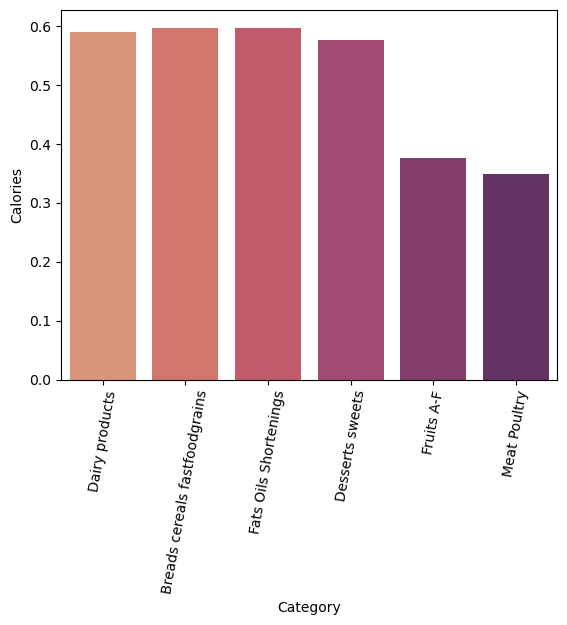

In [67]:
cals= data.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = sns.barplot(top_20_cals,x= 'Category', y='Calories', palette='flare',ci=None,)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 80)


[Text(0, 0, 'Fish Seafood'),
 Text(1, 0, 'Fats Oils Shortenings'),
 Text(2, 0, 'Dairy products'),
 Text(3, 0, 'Breads cereals fastfoodgrains'),
 Text(4, 0, 'Meat Poultry')]

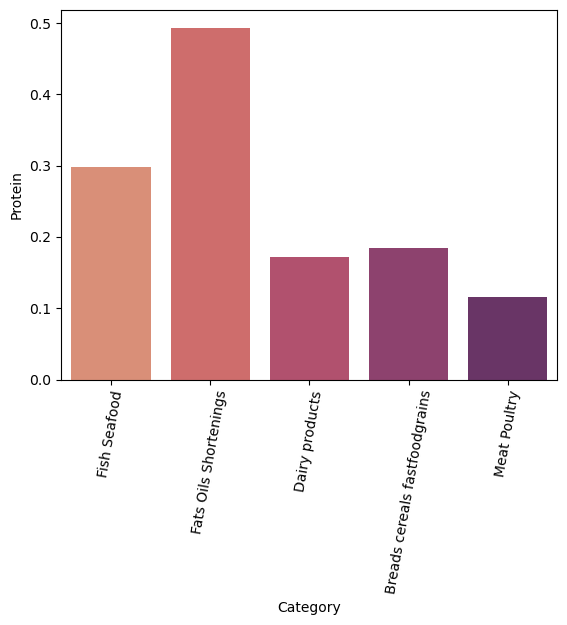

In [66]:
# fig = sns.barplot(x='Protein',y='Category', data=data, order = data['Category'].value_counts().index)
pro= data.sort_values(by='Protein', ascending= False)
top_20_pro=pro.head(20)
ax = sns.barplot(top_20_pro, y="Protein", x="Category",palette='flare',ci=None,)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)


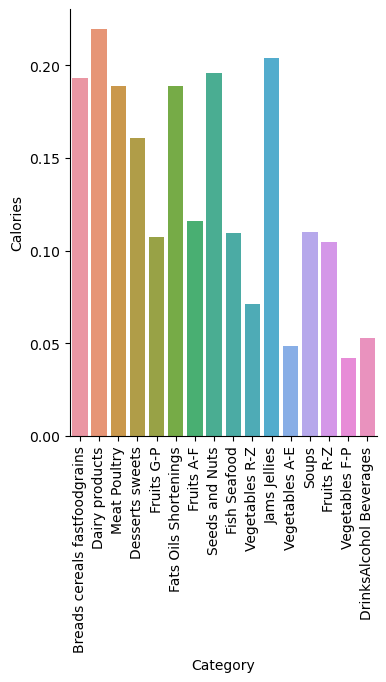

In [68]:
plot_order = data.groupby('Category')['Calories'].sum().sort_values(ascending=False).index.values
ax= sns.catplot(data=data, x='Category',  y='Calories',kind='bar',ci=None, legend_out=False, order=plot_order)
ax.set_xticklabels(rotation = 90)

[Text(0, 0, 'Breads cereals fastfoodgrains'),
 Text(1, 0, 'Desserts sweets'),
 Text(2, 0, 'Meat Poultry'),
 Text(3, 0, 'Dairy products'),
 Text(4, 0, 'Fruits G-P'),
 Text(5, 0, 'Vegetables A-E'),
 Text(6, 0, 'Vegetables R-Z'),
 Text(7, 0, 'Fruits A-F'),
 Text(8, 0, 'Fish Seafood'),
 Text(9, 0, 'Fats Oils Shortenings'),
 Text(10, 0, 'Vegetables F-P'),
 Text(11, 0, 'DrinksAlcohol Beverages'),
 Text(12, 0, 'Seeds and Nuts'),
 Text(13, 0, 'Soups'),
 Text(14, 0, 'Fruits R-Z'),
 Text(15, 0, 'Jams Jellies')]

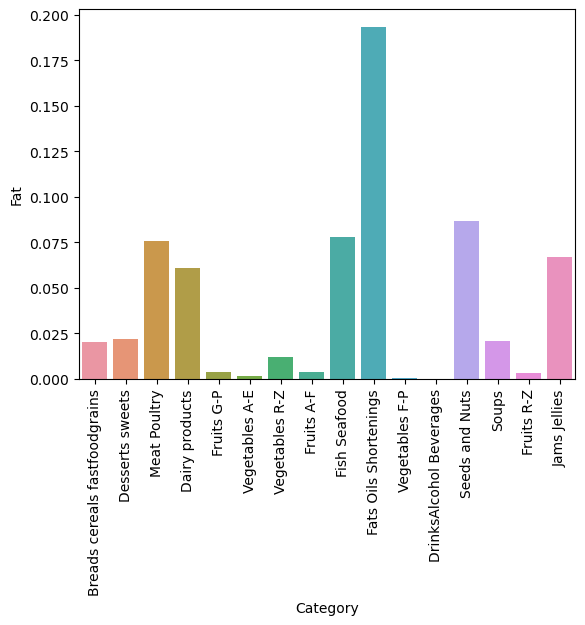

In [72]:
ax=sns.barplot(x= 'Category', y='Fat', data =data, order = data.value_counts('Category').index,ci=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


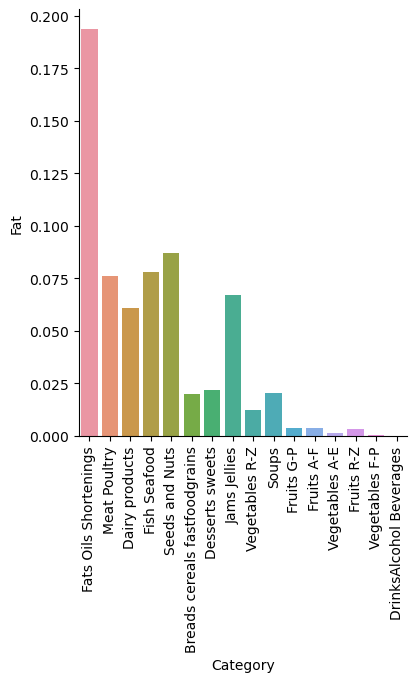

In [75]:
plot_order = data.groupby('Category')['Fat'].sum().sort_values(ascending=False).index.values
ax= sns.catplot(data=data, x='Category', y='Fat',kind='bar',ci=None, legend_out=False, order=plot_order)
ax.set_xticklabels(rotation = 90)